In [1]:
import sys
sys.path.insert(0, r"C:\Users\Rui Campos\Dropbox\MontyCarlo")
import MontyCarlo.materials.database as db
from numpy import *


________________
> Reading EADL. 
> Done! EPDL available @ database.EPDL
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

________________
> Reading EPDL. 
> Done! EPDL available @ database.EPDL
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

________________
> Reading EEDL. 
> Done! EPDL available @ database.EEDL
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

Imported databases


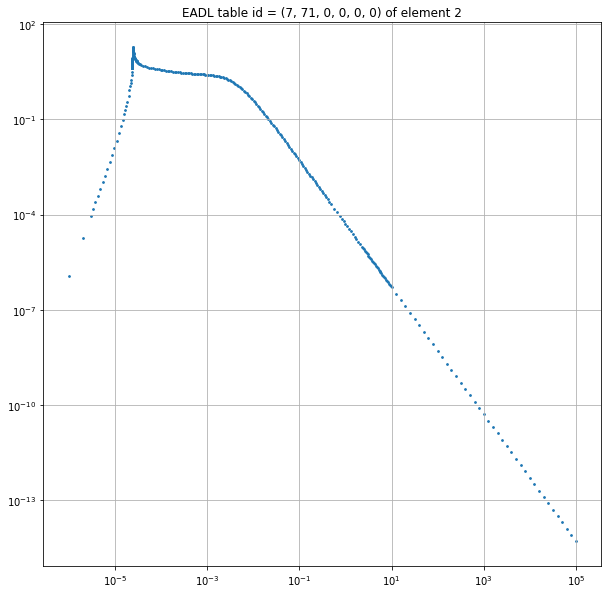

In [2]:
db.EPDL[1][(7, 71, 0, 0, 0, 0)].scatter()

In [3]:
from MontyCarlo.settings import __montecarlo__
__incoherent__ = __montecarlo__/'materials'/'photon'/'incoherent'
directory = str(__incoherent__)

from numba import *
from numpy import *

def getIFF(Z):
    import os
    path = directory + "\pickles\\" + str(Z)
    if not os.path.isfile(path):
        print("> Writing Incoherent Form Factor...")
        
        from ...database import EPDL
        IFFdata = EPDL[Z-1][(7, 93, 0, 0, 0, 942)]
        
        from . import IncoherentFormFactorWriter
        IncoherentFormFactorWriter.IncoherentFormFactorWriter(IFFdata, Z)
        
    import dill as pickle
    
    with open(path, 'rb') as file:
        param = pickle.load(file)

    a1, a2, a3, a4, a5 = param


    @njit
    def _eval(x):
        A = 1 + a1*x**2 + a2 * x**3 + a3 * x**4
        B = 1 + a4*x**2 + a5 * x**4
        return Z*(1 - A/B**2)

    return _eval

FFlist = [getIFF(Z) for Z in range(1, 70)]

In [6]:
getIFF(1)

CPUDispatcher(<function getIFF.<locals>._eval at 0x000001F8E046A1F0>)

In [4]:
from numba import *

def getErr(Z):
    
    FFdata = db.EPDL[Z-1][(7, 93, 0, 0, 0, 942)]
    
    FFx, FFy = FFdata.X, FFdata.Y
    x = FFx*1e8
    y = FFy

    #y = y[5.00E-03*1e-8 < x]
    #x = x[5.00E-03*1e-8 < x]

    #x = x[9.9999E-1 > y]
    #y = y[9.9999E-1 > y]
    
    w = (Z-y)*y
    
    w = 1/array(w)
    w = [W if W != inf else 0 for W in w ]
    w = array(w)
    
    
    
    #print(w)
    
    @njit
    def error(param):
        """
        Error to be minimized.
    

        Equation 30 @ photonCS1994
        https://drive.google.com/file/d/1Rt2DqkhwJINQC1S469adqn5Whz9110ep
    
        """
        a1, a2, a3, a4, a5 = param
        #yAxisTrue = func(xAxis, *param)
    
        
        A = 1 + a1*x**2 + a2 * x**3 + a3 * x**4
        B = 1 + a4*x**2 + a5 * x**4
        
        yfit = (1 - A/B**2)*Z
        
        return sum(w*(yfit - y)**2)
    
    return error


In [8]:
getErr(1)

<ipython-input-7-90c84855322b>:19: RuntimeWarning: divide by zero encountered in true_divide
  w = 1/array(w)


CPUDispatcher(<function getErr.<locals>.error at 0x000001F8EB73A040>)

# Explicar o que o codigo faz


$$ F = ma $$


Texto qq. **Negrito**, *italico*

[asdsa](http://google.com)

![texto altern](https://upload.wikimedia.org/wikipedia/commons/1/14/Early_blue_and_white_ware_circa_1335_Jingdezhen.jpg)

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from matplotlib.pyplot import *
from numpy import *
from MontyCarlo.tools.data import getAxis
from scipy.optimize import *
def graph(Z, x1, x2, y1, y2, deg):
    FFdata = db.EPDL[Z-1][(7, 93, 0, 0, 0, 942)]
    
    FFx, FFy = FFdata.X, FFdata.Y
    FFx = FFx*10**8
    FFy = FFy
    
    fig = figure(figsize=(10, 10))
    
    #x1, x2 = map(lambda x: 10**x, (x1, x2))
    #y1, y2 = map(lambda x: 10**x, (y1, y2))
    
    x = logspace(x1, x2, num=350)#, (x2 - x1)/((x1+x2)*100))
    
    #from scipy.optimize import basinhopping
    #err = getErr(Z)
    #a1, a2, a3, a4, a5 = fmin(err, 5*[5], maxfun=1e7)
    
    
    #res = basinhopping(err, 
    #                tuple(5*[0]),
    #                niter = 200,
    #                minimizer_kwargs = dict(method = 'Nelder-Mead'))
    
    #print(res)
    #print(err(5*[3]))
    #res = basinhopping(err, 5*[3])

    #a1, a2, a3, a4, a5 = res.x
    

    #from scipy.optimize import differential_evolution
    #a1, a2, a3, a4, a5 = brute(err,
    #                           [(0, 20), (-120, 280),
    #                            (0, 2000), (0, 100),
    #                            (0, 200)], finish = fmin, Ns=0)
    
    
    
    #res = differential_evolution(err,[(0, 20), (-120, 280),
    #                                            (0, 2000), (0, 100),
    #                                            (0, 200)], workers = -1, maxiter=100000)
    
    #a1, a2, a3, a4, a5 = res.x
    #print(res)
    
    
    
    
    @njit
    def func(x):
        """x = 10**-10 * sin(theta/2)/lambda"""
        A = 1 + a1*x**2 + a2 * x**3 + a3 * x**4
        B = 1 + a4*x**2 + a5 * x**4
        return (1-A/B**2)*Z
    
    f = func
    
    P = polyfit(log10(FFx+1), log10(FFy+1), deg=deg)
    f = poly1d(flip(P))
    
    y = [10**(f(log10(X+1)-1)) for X in x]
    #print(y)
    plot(x, y)
    
    
    ax = gca()
    
    scatter(FFx, FFy, s = 2, color="red")
    
    ax.set_yscale("log"); ax.set_xscale("log")
    ax.set_title("Form Factor of Element " + str(Z))
    ax.set_xlabel("x (cm^-1)")
    ax.grid(which='both')
    
    ax.set_ylim(10**y1, 10**y2)
    ax.set_xlim(10**x1, 10**x2)
    
    Y = [f(X) for X in FFx]
    Y = array(Y)
    print(sum((FFy - Y)**2))
    #display(f(1))
    return f
    


In [6]:
from ipywidgets import IntSlider
a = IntSlider(min=1, max=100, step=1, continuous_update = False)

x2 = IntSlider(value = 4, min=-10, max=4, step=1, continuous_update = False)
x1 = IntSlider(value = -10, min=-10, max=4, step=1, continuous_update = False)

y2 = IntSlider(value = 1, min=-10, max=1, step=1, continuous_update = False)
y1 = IntSlider(value = -10, min=-10, max=1, step=1, continuous_update = False)

deg = IntSlider(value = 1, min = 1, max = 59, continuous_update = False)

w = interact(graph, Z = a, 
             y1=y1, y2=y2, 
             x1=x1, x2=x2, deg = deg) 

interactive(children=(IntSlider(value=1, continuous_update=False, description='Z', min=1), IntSlider(value=-10…

In [43]:
help(IntSlider)

Help on class IntSlider in module ipywidgets.widgets.widget_int:

class IntSlider(_BoundedInt)
 |  IntSlider(*args, **kwargs)
 |  
 |  Slider widget that represents an integer bounded from above and below.
 |  
 |  Method resolution order:
 |      IntSlider
 |      _BoundedInt
 |      _Int
 |      ipywidgets.widgets.widget_description.DescriptionWidget
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.valuewidget.ValueWidget
 |      ipywidgets.widgets.widget_core.CoreWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, value=None, min=None, max=None, step=None, **kwargs)
 |      Parameters
 |      ----------
 |      value: integer
 |          The initial value.
 |      min: integer
 |          The lower limit for the value.
 |      max: integer
 |          The

In [66]:
def graph_error(Z):

    
    
    FFdata = db.EPDL[Z-1][(7, 93, 0, 0, 0, 942)]
    err = getErr(Z)
    #a1, a2, a3, a4, a5 = fmin(err, 5*[5], maxfun=1e7)
    
    
    res = basinhopping(err, 
                    tuple(5*[0]),
                    niter = 200,
                    minimizer_kwargs = dict(method = 'Nelder-Mead'))
    a1, a2, a3, a4, a5 = res.x
    @njit
    def func(x):
        """x = 10**-10 * sin(theta/2)/lambda"""
        A = 1 + a1*x**2 + a2 * x**3 + a3 * x**4
        B = 1 + a4*x**2 + a5 * x**4
        return (1-A/B**2)*Z
    
    f = func
    
    FFx, FFy = FFdata.X, FFdata.Y
    FFx = FFx*10**6
    FFy = FFy/Z
    
    Yfit = [Z**-1 * f(x) for x in FFx]
    Yfit = array(Yfit)
    fig = figure(figsize=(10, 10))
    err = Yfit - FFy
    
    print(f"""
    max err = {max(err)}
    min err = {min(err)}
    """)
    
    hist(err, bins = 300)
    title("Error distribution for fit of element " + str(Z))

In [68]:
w = interact(graph_error, Z = IntSlider(min = 1, max = 70))

interactive(children=(IntSlider(value=1, description='Z', max=70, min=1), Output()), _dom_classes=('widget-int…

In [ ]:
a = fit(3)



In [ ]:
from scipy.optimize import fmin



err = fit(6)

err(fmin(err, 5*[3], maxfun=1e6))



In [ ]:
array(5*[0])

In [ ]:
help(fmin)

In [140]:
from MontyCarlo.tools import RITA

In [254]:
def f(x):
    return exp(-x)

RI = RITA.RationalInterpolation(f, 0, 100, True)




ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'MontyCarlo.tools.RITA.Interval._eval'
Traceback (most recent call last):
  File "<ipython-input-254-2eca1893ac94>", line 4, in <module>
ZeroDivisionError: float division


In [257]:
from numpy.random import rand

sample = [RI.invCum(rand()) for _ in range(1_000_000)]

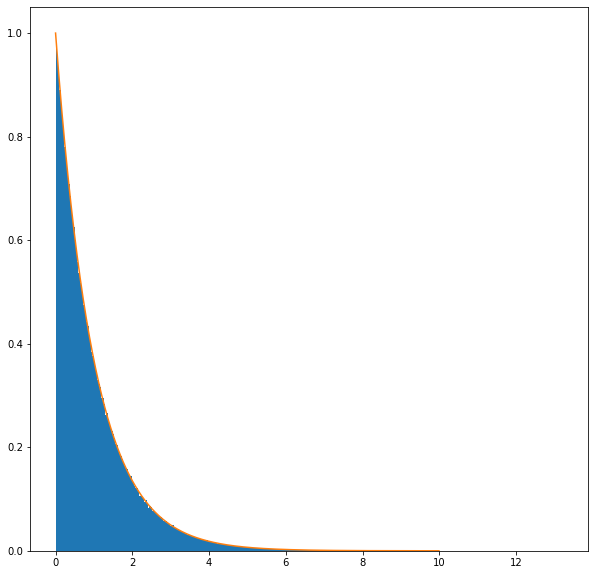

In [258]:
figure(figsize=(10, 10))

_ = hist(sample, bins = 400, density=True)
x = arange(0, 10, .01)
plot(x, f(x))

In [32]:
def f():
    for i in range(6_000):
        x = 2**i

In [33]:
%%timeit
f()

29 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%cython

UsageError: Cell magic `%%cython` not found.
